# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [4]:
mean, std = (np.mean(medical.charges), np.std(medical.charges, ddof=1))
print(f"A: The calculated mean = {mean:.2f} and standard deviation = {std:.2f}.")

A: The calculated mean = 13270.42 and standard deviation = 12110.01.


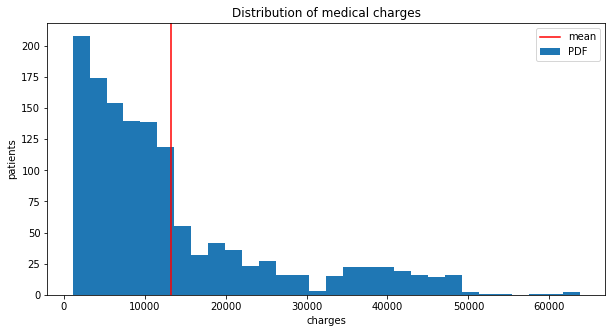

In [5]:
plt.figure(figsize=(10,5))
plt.hist(medical.charges, bins=30)
plt.axvline(medical.charges.mean(), color='r')
plt.xlabel('charges')
plt.ylabel('patients')
plt.title('Distribution of medical charges')
plt.legend(['mean', 'PDF']); 

The distribution of medical charges is no normal. It is skewed to the right and has a long tail with a few values bigger than 50,000 dollars.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can perform a t-test to test the null hypothesis mu < 12,000. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the threatening average charge value of 12,000.00 is lower than the sample mean which is 13270.42, a one-sided interval will be sufficient to address the administrtaor's concern about the hospital operational model.

In [30]:
# Calculate the critical value for a 95% confidence interval
mean_margin_error = 1.96 * std/np.sqrt(len(medical))
print(f'The mean 95% margin of error is {mean_margin_error:.2f}')

# Calculate the 95% Confidence Interval of the mean
leftend = mean - mean_margin_error
rightend = mean + mean_margin_error
print(f'The mean charges 95% confidence interval is ({leftend:.2f}, {rightend:.2f}).')

The mean 95% margin of error is 648.89
The mean charges 95% confidence interval is (12621.53, 13919.31).


__One sample t-test:__ The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

In [46]:
# One sample t-test 
print('Null hypothesis: mu < 12,000')
print('Alternative hypothesis: mu >= 12,000')
tset, pval = ttest_1samp(medical.charges, 12000)
print('One sample t-test: p-value =', pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since the p-value is less than 0.05, we are rejecting null hypothesis in favor of the alternative hypothesis.")
else:
  print("We do not have evidence to rejecht the null hypothesis.")

Null hypothesis: mu < 12,000
Alternative hypothesis: mu >= 12,000
One sample t-test: p-value = 0.000130171652092872
Since the p-value is less than 0.05, we are rejecting null hypothesis in favor of the alternative hypothesis.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here: __Null hypothesis:__ no difference between charges between people with insurance and those without. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. A large variance indicates that numbers in the set are far from the mean and far from each other. A small variance, on the other hand, indicates the opposite.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ See code results below using the above formulae.

In [51]:
# Identify insuranced and uninsuranced patients
insuranced = medical.charges[medical.insuranceclaim == 1]
uninsuranced = medical.charges[medical.insuranceclaim == 0]

x0 = insuranced.mean(); s0 = insuranced.std(); n0 = len(insuranced)
x1 = uninsuranced.mean(); s1 = uninsuranced.std(); n1 = len(uninsuranced)
print(f'insurance_mean = {x0:.2f}, uninsurance_mean = {x1:.2f}')
print(f'insurance_std = {s0:.2f}, uninsurance_std = {s1:.2f}')
print(f'insurance_total = {n0:.0f}, uninsurance_total = {n1:.0f}')

# The pooled standard deviation of the two groups is given by:
sp = np.sqrt( ((n0-1)*s0**2 + (n1-1)*s1**2) / (n0 + n1 -2) )

# The t-test statistic is then given by:
t = (x0 -  x1) / (sp*np.sqrt(1/n0 + 1/n1))
print('t-statistic =', t)

insurance_mean = 16423.93, uninsurance_mean = 8821.42
insurance_std = 14045.93, uninsurance_std = 6446.51
insurance_total = 783, uninsurance_total = 555
t-statistic = 11.89329903087671


In [36]:
# Use ttest_ind from scipy.stats to perform a t-test on two independent samples
st.ttest_ind(insuranced, uninsuranced)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Since the pvalue of the ttest for the insurance and uninsurance statistics is < 0.05 we rejec the null hypothesis, which stated that there is no difference between charges for people with insurance and those without. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I did not see an equivalent z-test in the documentation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

In [9]:
# Boostrap Practice

In [77]:
# Boostrapping sample
def boostrapping_sampling(n=1000):
  # Next, generate a boostrapping sample n times and extract the mean value
  bootstrap = pd.DataFrame({'meancharges': [medical.sample(1000, replace=True).charges.mean() for i in range(n)]})
  mean = bootstrap.meancharges.mean()
  std = bootstrap.meancharges.std()

  # Plot mean charges distributon, mean, and the 95% confidence interval
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1); bootstrap.meancharges.hist(histtype='step', bins=30)
  plt.axvline(mean, color='black', linestyle='-.')
  #--------------------------------------------------------------
  # 95% confidence interval: (mean - MoE, mean + MoE), where MoE = margin of error
  MoE = 2*std
  plt.axvline(mean - MoE, color='red', linestyle='--')
  plt.axvline(mean + MoE, color='red', linestyle='--')
  plt.xlabel('charges')
  plt.ylabel('number of patients')
  plt.title(f'Mean charges PDF, bootstrap {n} samples')
  print(f'Bootstrap: mean charges 95% confidence interval ({(mean - MoE):.2f}, {(mean + MoE):.2f}).')
  #--------------------------------------------------------------
  plt.subplot(1,2,2); bootstrap.meancharges.plot(kind='box')
  plt.title(f'Mean charges Boxplot');

  return bootstrap.describe()

Bootstrap: mean charges 95% confidence interval (12496.11, 14083.26).


,meancharges
count,1000.000000
mean,13289.687372
std,396.786635
min,11992.926363
25%,13024.111324
50%,13284.332932
75%,13556.552480
max,14823.060589


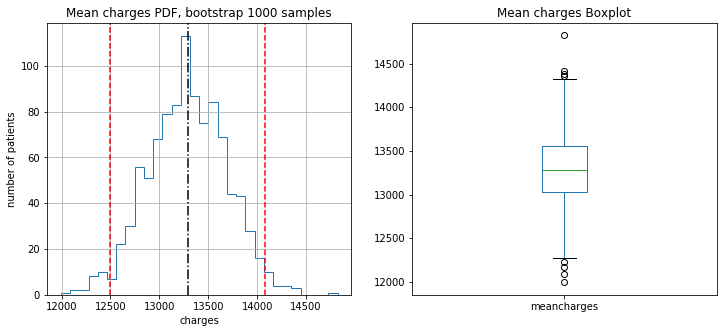

In [78]:
# Next, generate a boostrapping sample 1000 times and extract the mean value
boostrapping_sampling(1000)